In [12]:
import sqlite3
import pandas as pd
import pickle

db_path = "resource/mistral/epoch-11/charts.db"

conn = sqlite3.connect(db_path)

query = "SELECT key, value FROM 'unnamed'"
df = pd.read_sql_query(query, conn)
conn.close()

def deserialize_blob(blob):
    try:
        return pickle.loads(blob)
    except Exception as e:
        return f"Error deserializing: {e}"

df['deserialized_value'] = df['value'].apply(deserialize_blob)
df = df[['key', 'deserialized_value']]

In [13]:
df

,key,deserialized_value
0,cfg,"{'experiment_name': 'owl', 'llm_backbone': '/g..."
1,validation,"{'BLEU': {'steps': [1020.0, 2040.0, 3060.0, 40..."
2,df,{'train_data': '/g/data/g40/ha2606/llm-output/...
3,train,"{'loss': {'steps': [20.0, 40.0, 60.0, 80.0, 10..."
4,meta,"{'lr': {'steps': [20.0, 40.0, 60.0, 80.0, 100...."
5,internal,"{'total_training_steps': {'steps': [None], 'va..."


<Axes: xlabel='steps'>

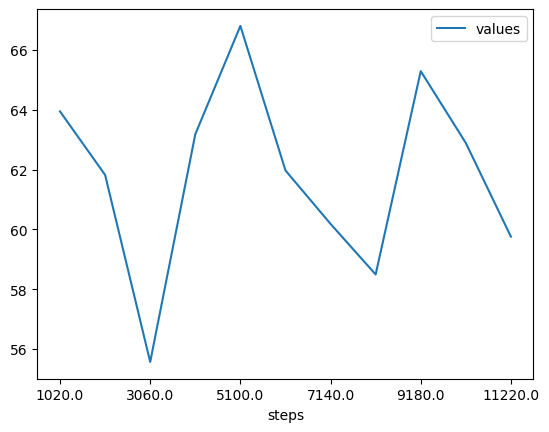

In [45]:
BLEU = pd.DataFrame(df.iloc[1]['deserialized_value']).T.explode(["steps", "values"]).reset_index()
BLEU = BLEU[['steps', 'values']]
BLEU.plot(x='steps', y='values')

<Axes: xlabel='steps'>

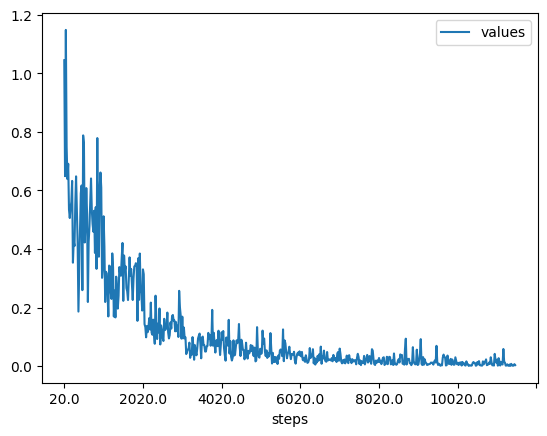

In [44]:
LOSS = pd.DataFrame(df.iloc[3]['deserialized_value']).T.explode(["steps", "values"]).reset_index()
LOSS = LOSS[['steps', 'values']]
LOSS.plot(x='steps', y='values')
